count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: Alcohol, dtype: float64
count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: Malic, dtype: float64
count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: Alcalinity_of_Ash, dtype: float64
count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: Magnesium, dtype: float64
count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: Total_phenols, dtype: float64
count    178.000000
mean       2.0

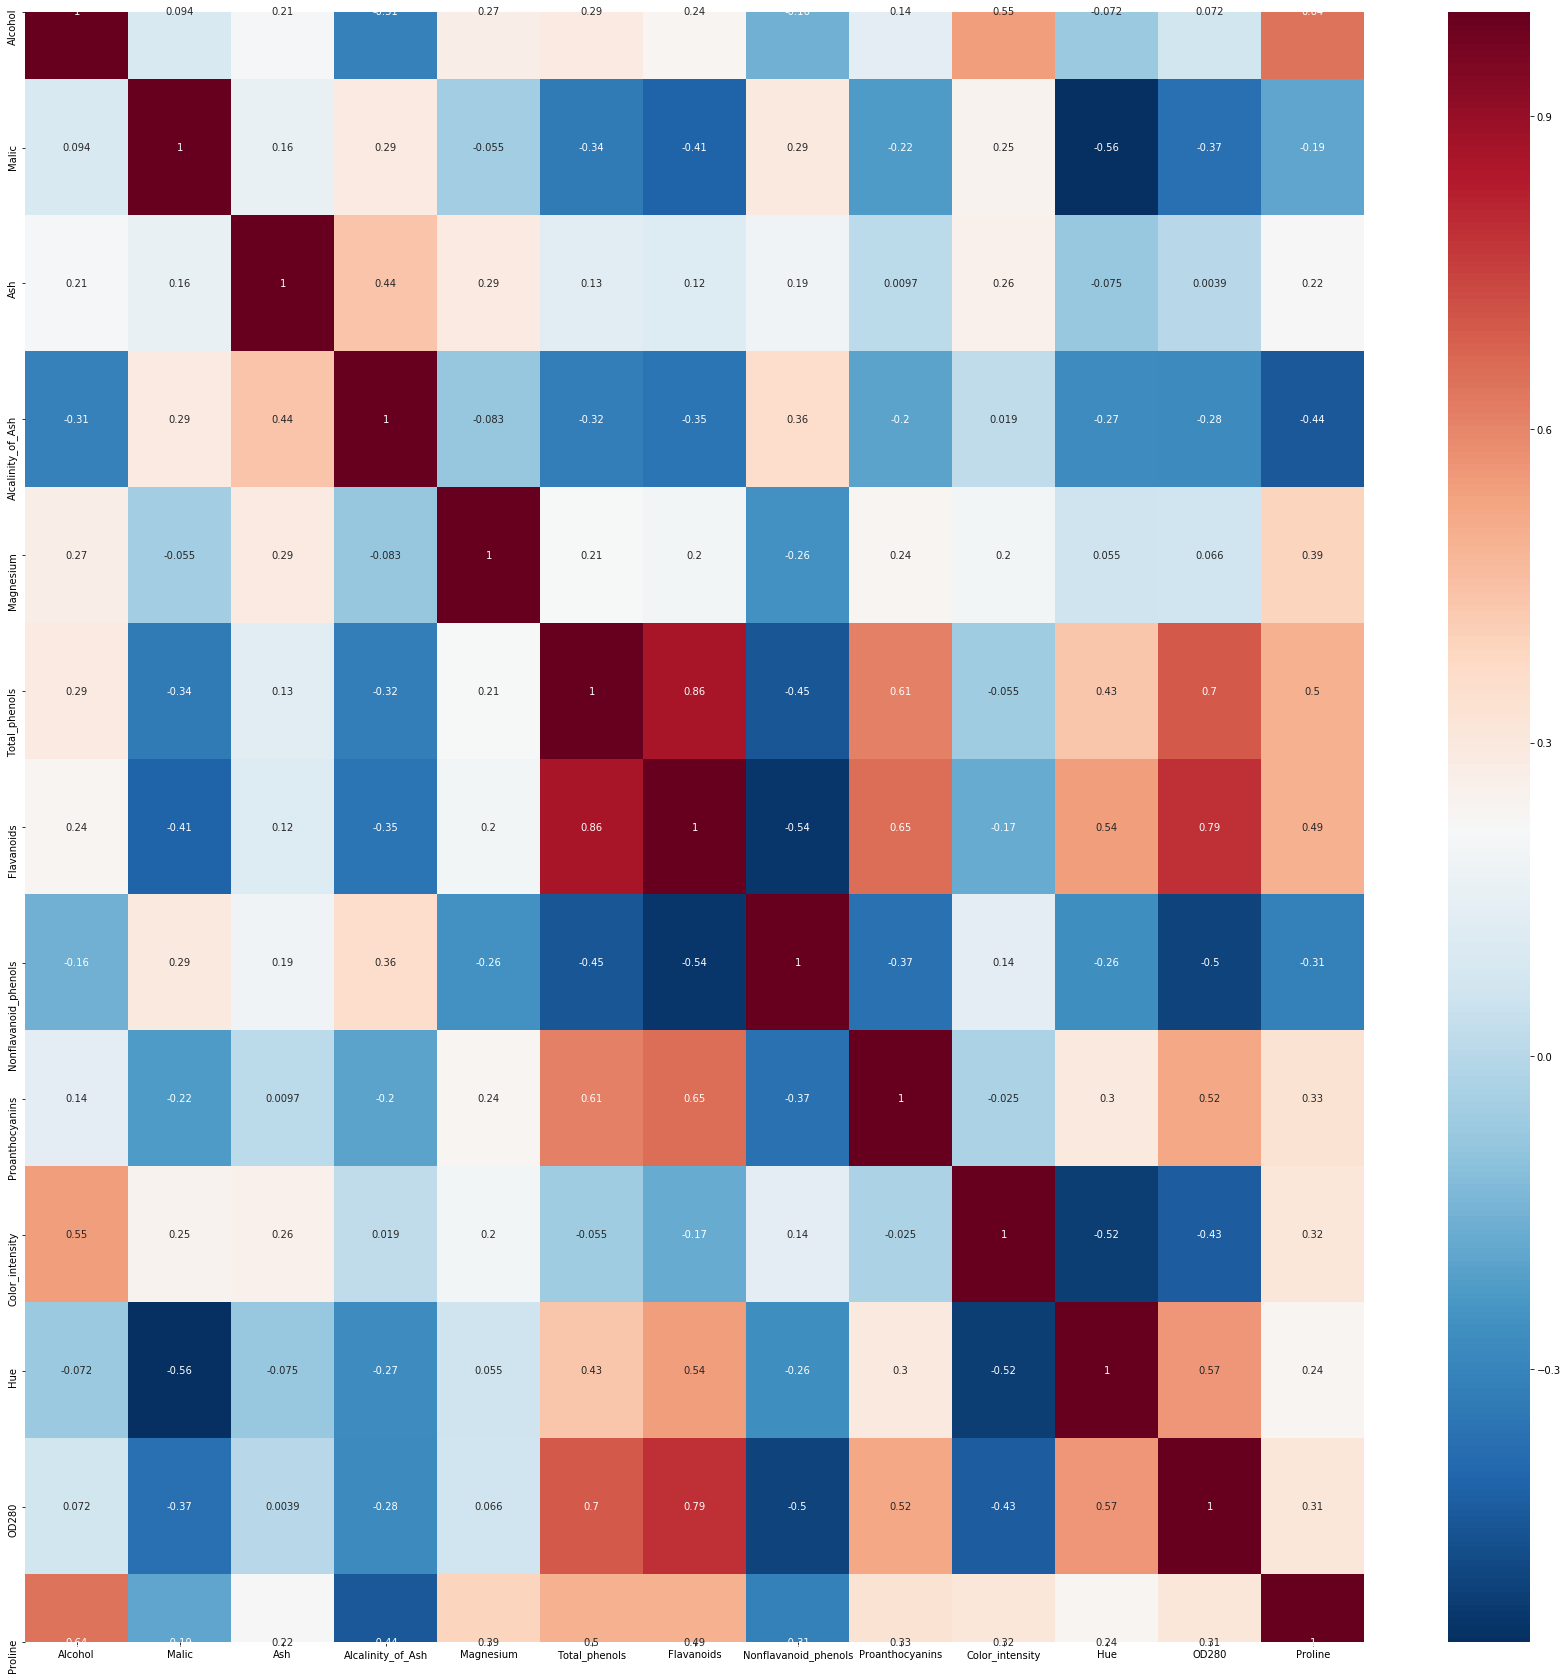

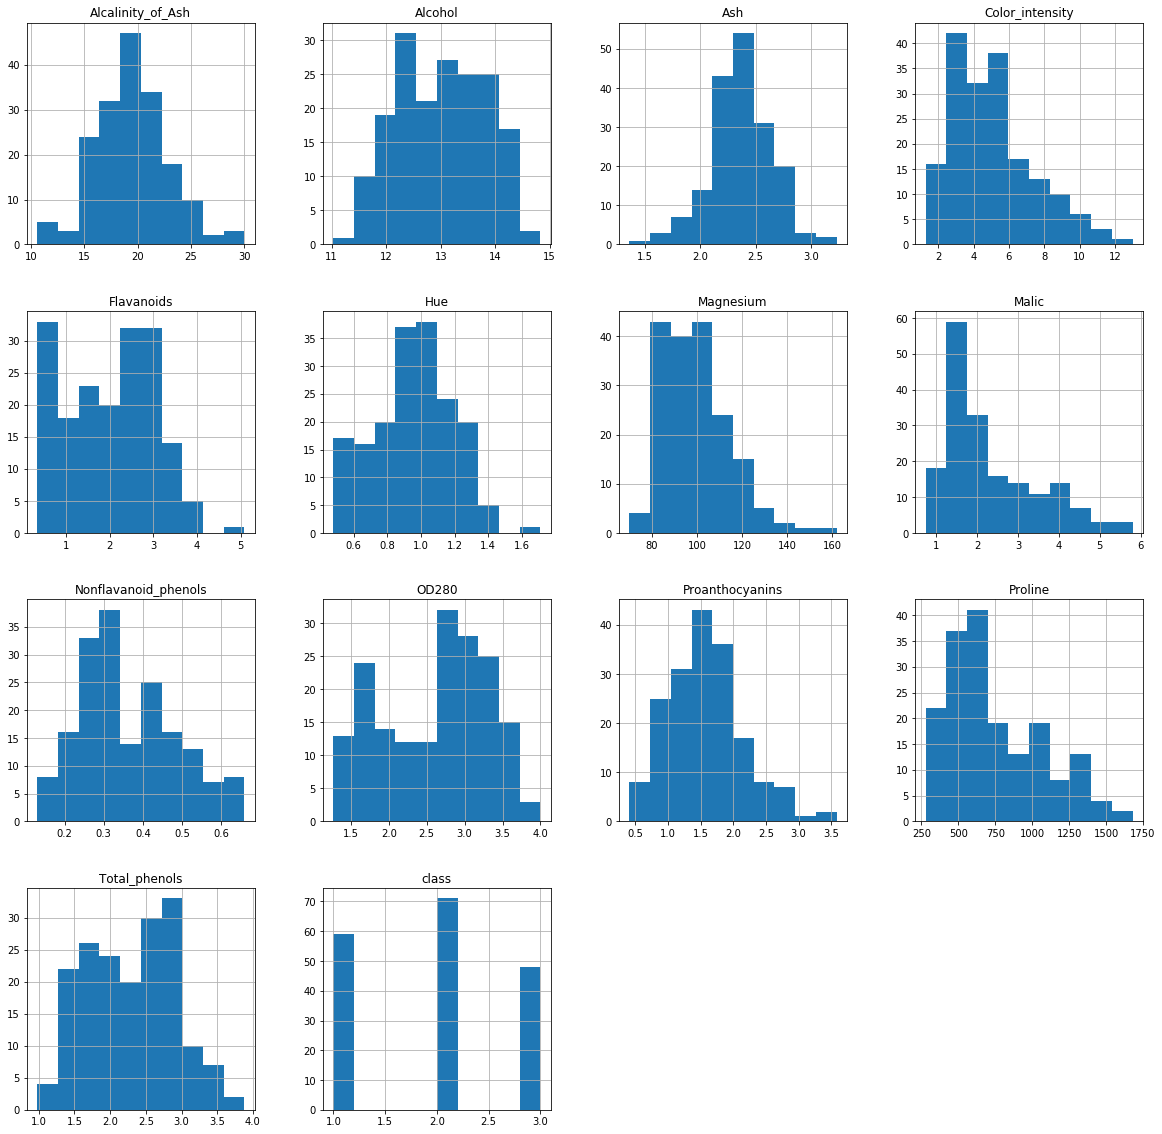

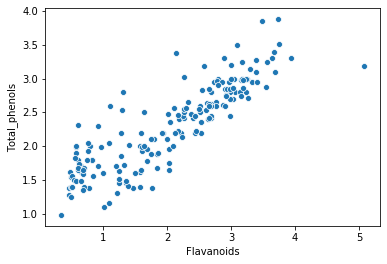

[1.19584434]
[[0.54170623]]


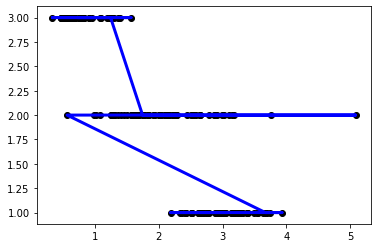

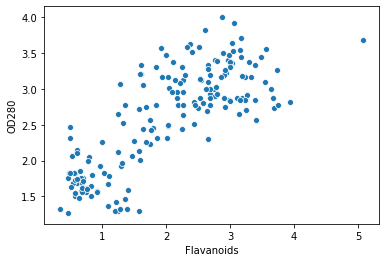

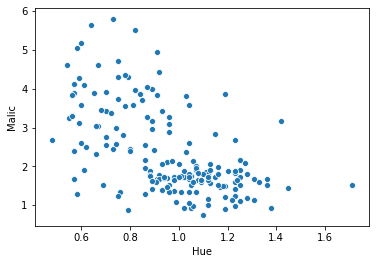

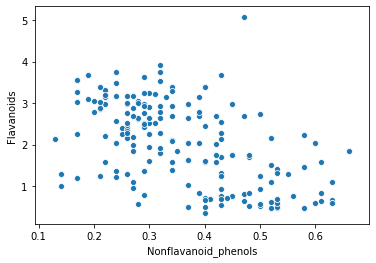

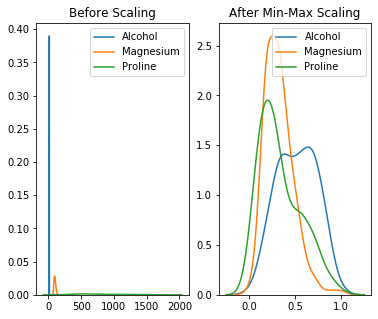

(0.394, 0.52]      48
(-0.001, 0.246]    45
(0.246, 0.394]     44
(0.52, 1.0]        41
Name: quantile_Hue, dtype: int64


In [57]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

columns = ["class","Alcohol","Malic","Ash","Alcalinity_of_Ash","Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"]
df = pd.read_csv("./wine.data",index_col=False, names = columns)
df.head()

X = df.drop('class', axis=1)
y = df['class']

#Correlation heat map is used to spot the linear relationship between features
wine_correlation = X.corr()
plt.figure(figsize=(30,30))
sns.heatmap(wine_correlation, annot=True,cmap ="RdBu_r");


df.hist(figsize=[20,20])

print(df['Alcohol'].describe())
#df['quantile_Alcohol'] = pd.qcut(df['Alcohol'], q=4)
#print(df['quantile_Alcohol'].value_counts())
#df.head()
print(df['Malic'].describe())
print(df['Alcalinity_of_Ash'].describe())
print(df['Magnesium'].describe())
print(df['Total_phenols'].describe())
print(df['Flavanoids'].describe())
print(df['Nonflavanoid_phenols'].describe())
print(df['Proanthocyanins'].describe())
print(df['Color_intensity'].describe())
print(df['OD280'].describe())
print(df['Proline'].describe())

plt.show()
sns.scatterplot(x='Flavanoids', y='Total_phenols', data=df);
plt.show()

# Determine the linear line between Flavanoid and Total_phenols
a = df[['Flavanoids']]
b = df[['Total_phenols']]
reg = LinearRegression().fit(a,b)

plt.scatter(x,y,  color='black')
plt.plot(x,y, color='blue', linewidth=3)

#the slope and coefficients are:
print(reg.intercept_)
print(reg.coef_)

plt.show()
sns.scatterplot(x='Flavanoids', y='OD280', data=df);
plt.show()
sns.scatterplot(x='Hue', y='Malic', data=df);
plt.show()
sns.scatterplot(x='Nonflavanoid_phenols', y='Flavanoids', data=df);
plt.show()



minmaxScaler = preprocessing.MinMaxScaler()
X_scaled_df = minmaxScaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled_df, columns=X.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X['Alcohol'], ax=ax1)
sns.kdeplot(X['Magnesium'], ax=ax1)
sns.kdeplot(X['Proline'], ax=ax1)

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_scaled_df['Alcohol'], ax=ax2)
sns.kdeplot(X_scaled_df['Magnesium'], ax=ax2)
sns.kdeplot(X_scaled_df['Proline'], ax=ax2)

plt.show();

X_scaled_df.head()

X_scaled_df['quantile_Hue'] = pd.qcut(X_scaled_df['Hue'], q=4)
print(X_scaled_df['quantile_Hue'].value_counts())
